# Midterm Report

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import dataFrame
df = pd.read_csv('data/bank-additional-full.csv',sep = ';')

In [3]:
# deal with missing data
df['education'].replace('unknown', np.nan, inplace=True)

In [4]:
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])

fraction of missing values in features:
education    0.042027
dtype: float64


In [5]:
df.dropna(subset=['education'],inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
## Clients information
df.iloc[:,:11].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307


In [7]:
## Campaign information
df.iloc[:,11:15].head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [9]:
## Other attributes
df.iloc[:,15:20].head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


##  Exploratory Data Analysis

In [10]:
for i in df.columns:
    print(i,len(df[i].value_counts()))

age 77
job 12
marital 4
education 7
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1528
campaign 42
pdays 26
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 314
nr.employed 11
y 2


In [977]:
# for i in df.columns:
#     if len(df[i].value_counts()) < 8 or i in ['month','job','education','day_of_week','contact','poutcome']:
#         print(i)
#         print(df[i].value_counts()) # value_counts for the categorical variable
#         pd.value_counts(df[i]).plot.bar()
#         plt.xlabel(i)
#         plt.ylabel('count')
#         plt.show()
#     else:
#         print(i)
#         print(df[i].describe()) # describle for continuous variables
#         df[i].plot.hist(bins = 15)
#         plt.xlabel(i)
#         plt.ylabel('count')
#         plt.show()

### 1. Bank client data

**Continous feature:**  age

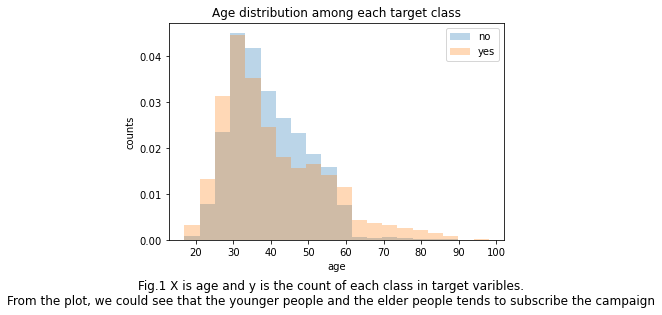

In [13]:
categories = df['y'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['y']==c]['age'],alpha=0.3,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.title('Age distribution among each target class')
plt.ylabel('counts')
plt.xlabel('age')
txt = '''Fig.1 X is age and y is the count of each class in target varibles.
From the plot, we could see that the younger people and the elder people tends to subscribe the campaign'''
plt.figtext(0.5, -0.1, txt, wrap=False, horizontalalignment='center', fontsize=12)
plt.show()
plt.savefig("figures/age_y.png",bbox_inches='tight')
plt.clf()

**Categrical features:**  job, education, housing, loan, default

In [15]:
clients_cdata = ['job', 'education', 'marital','housing', 'loan', 'default']

In [978]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=True, figsize=(12,10))
# for i in clients_cdata:
#     count_matrix = df.groupby([i, 'y']).size().unstack()
#     count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# #     print(count_matrix_norm)
#     count_matrix_norm.plot(kind='bar', stacked=True)
n = 0
for row in f1_axes:
    for col in row:
        i = clients_cdata[n]
        count_matrix = df.groupby([i, 'y']).size().unstack()
        count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#     print(count_matrix_norm)
        count_matrix_norm.plot(kind='bar', stacked=True, ax=col,alpha=0.6)
        col.set_xlabel(i)
        col.legend(loc=4)
        if n == 0 or n==3:
            col.set_ylabel("fraction of target class")
        n+=1
plt.savefig("figures/all_cat_y.png",bbox_inches='tight')
plt.clf()

<Figure size 864x720 with 0 Axes>

### 2. Features related to the last contact of the current campaign

In [17]:
df_my = df.groupby(['month','y']).size().unstack()
new_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df_my = df_my.reindex(new_order, axis=0)

In [18]:
df_mc = df.groupby(['month'])['campaign'].sum()
df_mc = df_mc.reindex(new_order, axis=0)

In [19]:
df_mpre = df.groupby(['month'])['previous'].sum()
df_mpre = df_mpre.reindex(new_order, axis=0)
# df_mpre

In [983]:
fig, ax = plt.subplots(2,1,figsize=(6,6))
ax[0].plot(df_my.index,df_my['yes'],marker='o',linestyle='--')
ax[0].plot(df_my.index,df_my['no'],marker='o',linestyle='--')

ax[0].set_ylabel("Responses")
ax[0].legend(['yes','no'])

ax[1].plot(df_mpre.index, df_mpre)
ax[1].plot(df_mc.index, df_mc)

ax[1].set_xlabel("Time (months)")
ax[1].set_ylabel("Contacts")
ax[1].legend(['Previous','During Camp'])
# ax.set_title("Weather patterns in Austin and Seattle")

# plt.show()
plt.savefig("figures/concact_y_month.png",bbox_inches='tight')
plt.clf()

<Figure size 432x432 with 0 Axes>

In [982]:
df_dy = df.groupby(['day_of_week','y']).size().unstack()
new_order = ['mon','tue','wed','thu','fri']

df_dy = df_dy.reindex(new_order, axis=0)
df_dc = df.groupby(['day_of_week'])['campaign'].sum()
df_dc = df_dc.reindex(new_order, axis=0)

df_dpre = df.groupby(['day_of_week'])['previous'].sum()
df_dpre = df_dpre.reindex(new_order, axis=0)
fig, ax = plt.subplots(2,1,figsize=(6,6))

ax[0].plot(df_dy.index,df_dy['yes'],marker='o',linestyle='--')
ax[0].plot(df_dy.index,df_dy['no'],marker='v',linestyle='--')
ax[1].plot(df_dpre.index, df_dpre)
ax[1].plot(df_dc.index, df_dc)

# plt.show()
plt.savefig("figures/concact_y_day.png",bbox_inches='tight')
plt.clf()

<Figure size 432x432 with 0 Axes>

In [22]:
pre_cat=['Old Customer(previous>=1)' if i >= 1 else 'New Customer\(previous=0)' for i in df['previous']]
df['pre_cat']=pre_cat
count_matrix = df.groupby(['pre_cat', 'y']).size().unstack()
count_matrix_norm1 = count_matrix.div(count_matrix.sum(axis=1),axis=0)
# print(count_matrix_norm)

camp_cat=['Total clients' if i >= 1 else 'Uncontacted Customer' for i in df['campaign']]
df['camp_cat']=camp_cat
count_matrix = df.groupby(['camp_cat', 'y']).size().unstack()
count_matrix_norm2 = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm= count_matrix_norm1.append(count_matrix_norm2)


In [984]:
count_matrix_norm.plot(kind='bar', stacked=True,alpha = 0.7)
plt.xticks(rotation = 30)
plt.ylabel('fraction of target class')
plt.legend(loc=4)
plt.savefig("figures/concact_y_reject.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [30]:
dur_y = df[df['campaign'] != 0][df['y'] == 'yes']['duration']
dur_n = df[df['campaign'] != 0][df['y'] == 'no']['duration']

In [986]:
plt.hist(dur_y,alpha=0.3,label=c,range=bin_range,bins=20,density=True)
plt.hist(dur_n,alpha=0.3,label=c,range=bin_range,bins=20,density=True)
plt.legend(['yes','no'])
plt.title('Duration distribution among each target class')
plt.ylabel('counts')
plt.xlabel('duration')
# plt.show()
plt.savefig("figures/duration_y.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [32]:
edu = df.groupby(['education','y']).size().unstack()
# edu_prev = df.groupby('education')['previous'].sum()
edu_order = ['illiterate','basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
edu = edu.reindex(edu_order, axis=0).iloc[::-1]
# edu

In [987]:
fig, ax = plt.subplots()
ax.bar(edu.index, edu["yes"],label="yes")
ax.bar(edu.index, edu['no'], label="no",bottom=edu['yes'])
ax.set_xticklabels(edu.index, rotation=90)
ax.set_ylabel("Number of Clients")
ax.legend()
# plt.show()
plt.savefig("figures/edu_y.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [34]:
count_matrix = df.groupby(['contact', 'y']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

y                no       yes
contact                      
cellular   0.854857  0.145143
telephone  0.948221  0.051779


In [988]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of target class')
plt.legend(loc=4)
plt.title('Fraction of target class in each Default condition')
txt = '''Fig.2 X is default condition and y is fraction of target class.
From the plot, if people has credit default, it is impossible for him/her to subscribe a term deposit '''
plt.figtext(0.5, -0.25, txt, wrap=False, horizontalalignment='center', fontsize=12)
# plt.show()
plt.savefig("figures/tool_y.png",bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

### 3. Social and economic context attributes

In [38]:
df_c = df.select_dtypes([int,float]).iloc[:,1:]
len(df_c.columns)

9

In [989]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=3, constrained_layout=True, figsize=(12,9))
n = 0
for row in f1_axes:
    for col in row:
        i = df_c.columns[n]
        dataset = [df[df['y']=='yes'][i].values,
           df[df['y']=='no'][i].values]
        col.violinplot(dataset = dataset)
        col.set_xlabel(i)
        col.set_xticks([1,2]) 
        col.set_xticklabels(['yes','no'])
        if n == 0 or n==3 or n == 6:
            col.set_ylabel("fraction of target class")
        n+=1
plt.savefig("figures/all_num_y.png",bbox_inches='tight')
plt.clf()

<Figure size 864x648 with 0 Axes>

In [990]:
df_c['y_dummy'] = pd.get_dummies(df['y']).iloc[:,1]
corr = df_c.corr()
f = plt.figure(figsize=(10, 9))
plt.matshow(corr,fignum=f.number,cmap='Blues')
plt.xticks(range(df_c.shape[1]), df_c.columns, fontsize=14, rotation=45)
plt.yticks(range(df_c.shape[1]), df_c.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# corr.style.background_gradient(cmap='Reds').set_precision(2)
plt.savefig("figures/correlation_matrix.png",bbox_inches='tight')
plt.clf()

<Figure size 720x648 with 0 Axes>

##  Split the data into different sets

In [331]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split,StratifiedKFold


y = df['y']
X = df.loc[:, df.columns != 'y']
random_state = 42

# first split to separate out the training set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,stratify=y,random_state=random_state)
print('train balance:')
print(y_train.value_counts(normalize=True))
# # second split to separate out the validation and test sets
# kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=random_state)
# for train_index, val_index in kf.split(X_other,y_other):
#     X_train = X_other.iloc[train_index]
#     y_train = y_other.iloc[train_index]
#     X_val = X_other.iloc[val_index]
#     y_val = y_other.iloc[val_index]
#     print('train balance:')
#     print(y_train.value_counts(normalize=True))
#     print('val balance:')
#     print(y_val.value_counts(normalize=True))

train balance:
no     0.888767
yes    0.111233
Name: y, dtype: float64


## Preprocess the data

In [1004]:
ordinal_ftrs = ['education'] 
ordinal_cats = [['illiterate','basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']]
onehot_ftrs = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']
minmax_ftrs = ['age']
std_ftrs = ['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)

# the target variable still needs to be preprocessed separately
le = LabelEncoder()
y_train_prep = le.fit_transform(y_train)
# y_val_prep = le.transform(y_val)
y_test_prep = le.transform(y_test)

(35511, 22)
(35511, 56)


## Choose an evaluation metric

Because it is an imbalanced dataset, TNs would be large and the metric which contains TN should not be considered, like accuracy, where $a = (TP + TN) / (TP + TN + FP + FN)$. The f_beta score is a better choice because it is the weighted harmonic mean of P(precision) and R(recall):
$$f_{\beta} = (1 + \beta^2) \frac{P R}{\beta^2 P + R}$$

where $R = TP / (TP + FN)$, and $P = TP / (TP + FP)$.

Because the main way of Bank marketing is telemarketing, the cost is cheap, and we could like to capture more clients who would response 'yes' to the campaign. Thus, I choose $f_{1.5}$ to be my evaluation metric which would capture the largest fraction of the condition positive samples even if FPs will be large as a result.

In [735]:
from sklearn.metrics import fbeta_score
score = lambda x, y: fbeta_score(x, y, average='macro', beta=1.5)

## Choose one or more ML techniques

In [341]:
def resample(X,y):
    X_no = X_train_prep[y_train_prep==0,:]
    y_no = y_train_prep[y_train_prep==0]
    X_yes = X_train_prep[y_train_prep==1,:]
    y_yes = y_train_prep[y_train_prep==1]
    X_no_sample = X_no[random.sample(range(X_no.shape[0]),X_yes.shape[0])]
    y_no_sample = y_no[random.sample(range(X_no.shape[0]),X_yes.shape[0])]

    X_new = np.concatenate((X_no_sample, X_yes), axis=0)
    y_new = np.concatenate((y_no_sample, y_yes), axis=0)
    return X_new,y_new

In [342]:
X_train_new, y_train_new = resample(X_train_prep,y_train_prep)

In [1061]:
len(X_train_new)

7900

### logistic regression

In [740]:
from sklearn.metrics import make_scorer
def MLpipe(X,y,ML_algo,param_grid,score):
    
    res = []
    test_scores = []
    best_models = []
    for i in range(10):
        cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42*i)

        grid = GridSearchCV(ML_algo, param_grid=param_grid,scoring = make_scorer(score),
                                cv=cv, return_train_score = True)
        grid.fit(X, y)
        
        result = grid.cv_results_
        res.append(result)
        test_score = grid.score(X_test_prep, y_test_prep)
        test_scores.append(test_score)
        best_models.append(grid.best_params_)
    return best_models, test_scores, res

In [750]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LogReg = LogisticRegression(solver ='saga',max_iter = 1000, tol = 1e-2) 

param_grid = {'penalty':['l1'],
              'C': [0.01,0.1,1,10,100,1000]}
Log_best, Log_scores, Log_res = MLpipe(X_train_new, y_train_new,LogReg,param_grid,score)

In [1012]:
#### 

(0.7841241657544685, 0.00043845293335987906)

In [772]:
import pickle
# with open("Log_best.txt", "wb") as fp:   #Pickling
#    pickle.dump(Log_best, fp)
# with open("Log_scores.txt", "wb") as fp:   #Pickling
#    pickle.dump(Log_scores, fp)
# with open("Log_res.txt", "wb") as fp:   #Pickling
#    pickle.dump(Log_res, fp)

with open("Log_best.txt", "rb") as fp:   # Unpickling
    Log_best = pickle.load(fp)
with open("Log_scores.txt", "rb") as fp:   # Unpickling
    Log_scores = pickle.load(fp)
with open("Log_res.txt", "rb") as fp:   # Unpickling
    Log_res = pickle.load(fp)

In [775]:
Log_best[]

{'C': 10, 'penalty': 'l1'}

In [776]:
c = Log_best[0]['C']
penalty = Log_best[0]['penalty']
LogReg_best = LogisticRegression(penalty=penalty, C = c,solver ='saga',max_iter = 1000)
LogReg_best.fit(X_train_new,y_train_new)

LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='saga')

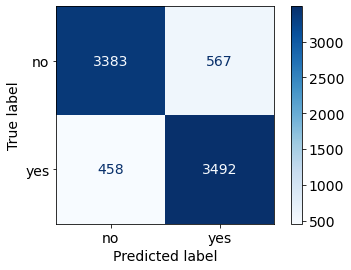

In [1075]:
from sklearn.metrics import plot_confusion_matrix
fig = plot_confusion_matrix(LogReg_best, X_train_new, y_train_new,
                      display_labels=['no','yes'],cmap='Blues')
plt.savefig("figures/log_confusion_matrix.png", bbox_inches="tight")

In [777]:
from sklearn.metrics import roc_curve, auc

def draw_roc(best_algo):
    #predict probabilities for X_test using predict_proba
    probabilities = best_algo.predict_proba(X_test_prep)

    # select the probabilities for label 1.0
    y_proba = probabilities[:, 1]

    # calculate false positive rate and true positive rate at different thresholds
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_prep, y_proba, pos_label=1)

    # calculate AUC
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    # plot the false positive rate on the x axis and the true positive rate on the y axis
    roc_plot = plt.plot(false_positive_rate,
                        true_positive_rate,
                        label='AUC = {:0.3f}'.format(roc_auc))

    plt.legend(loc=0)
    plt.plot([0,1], [0,1], ls='--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate');

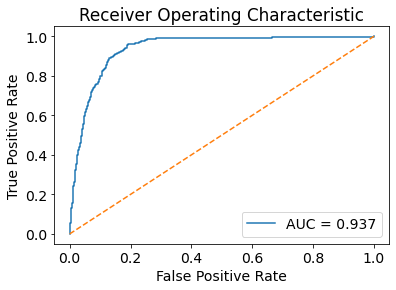

In [1074]:
draw_roc(LogReg_best)
plt.savefig("figures/log_ROC.png", bbox_inches="tight")

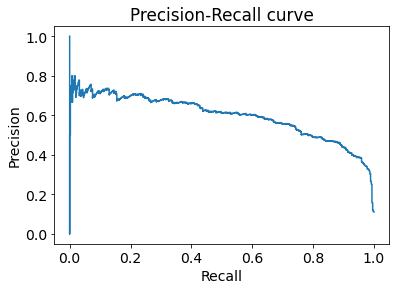

In [1073]:
disp = plot_precision_recall_curve(LogReg_best, X_test_prep, y_test_prep, name = 'RandomForest')
disp.ax_.set_title('Precision-Recall curve')
disp.ax_.get_legend().remove()
plt.savefig("figures/log_precision_recall_curve.png", bbox_inches="tight")

## RandomForestClassifier

In [749]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100],
              "max_features":[0.5,0.75,1.0],
              'max_depth': [5,10,20,30]}

RF = RandomForestClassifier()

RF_best_model, RF_socres, RF_res = MLpipe(X_train_new, y_train_new,RF,param_grid,score)

In [769]:
with open("RF_best_model.txt", "wb") as fp:   #Pickling
    pickle.dump(RF_best_model, fp)
with open("RF_socres.txt", "wb") as fp:   #Pickling
    pickle.dump(RF_socres, fp)
with open("RF_res.txt", "wb") as fp:   #Pickling
    pickle.dump(RF_res, fp)

with open("RF_best_model.txt", "rb") as fp:   # Unpickling
    RF_best_model = pickle.load(fp)
with open("RF_socres.txt", "rb") as fp:   # Unpickling
    RF_socres = pickle.load(fp)
with open("RF_res.txt", "rb") as fp:   # Unpickling
    RF_res = pickle.load(fp)

In [860]:
RF_best_model[0]

{'max_depth': 10, 'max_features': 0.5, 'n_estimators': 100}

In [782]:
n_estimators = RF_best_model[0]['n_estimators']
max_depth = RF_best_model[0]['max_depth']
RF_best = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
RF_best.fit(X_train_new,y_train_new)

RandomForestClassifier(max_depth=10)

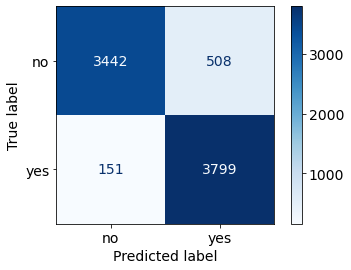

In [1072]:
plot_confusion_matrix(RF_best, X_train_new, y_train_new,
                      display_labels=['no','yes'],cmap='Blues')
plt.savefig("figures/rf_confusion_matrix.png", bbox_inches="tight")

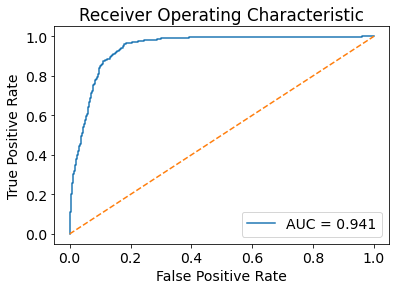

In [1076]:
draw_roc(RF_best)
plt.savefig("figures/rf_confusion_matrix.png", bbox_inches="tight")

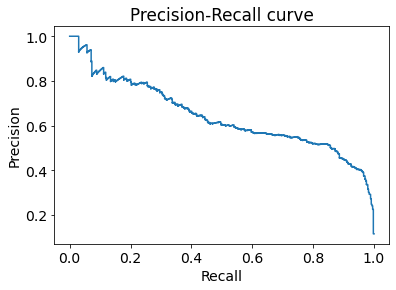

In [1077]:
disp = plot_precision_recall_curve(RF_best, X_test_prep, y_test_prep, name = 'RandomForest')
disp.ax_.set_title('Precision-Recall curve')
disp.ax_.get_legend().remove()
plt.savefig("figures/rf_precision_recall_curve.png", bbox_inches="tight")

## Support Vector Classifier -- Linear

In [755]:
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear')
param_grid = {'C':[0.01,0.1,1,10,100]}

svcL_best_model, svcL_socres, svcL_res = MLpipe(X_train_new, y_train_new,svc_linear,param_grid,score)

In [768]:
# with open("svcL_best_model.txt", "wb") as fp:   #Pickling
#     pickle.dump(svcL_best_model, fp)
# with open("svcL_socres.txt", "wb") as fp:   #Pickling
#     pickle.dump(svcL_socres, fp)
# with open("svcL_res.txt", "wb") as fp:   #Pickling
#     pickle.dump(svcL_res, fp)

with open("svcL_best_model.txt", "rb") as fp:   # Unpickling
    svcL_best_model = pickle.load(fp)
with open("svcL_socres.txt", "rb") as fp:   # Unpickling
    svcL_socres = pickle.load(fp)
with open("svcL_res.txt", "rb") as fp:   # Unpickling
    svcL_res = pickle.load(fp)

In [787]:
svcL_best_model[1]

{'C': 1}

In [788]:
c = svcL_best_model[1]['C']
svc_linear_best = SVC(kernel = 'linear', C = c,probability=True)
svc_linear_best.fit(X_train_new,y_train_new)

SVC(C=1, kernel='linear', probability=True)

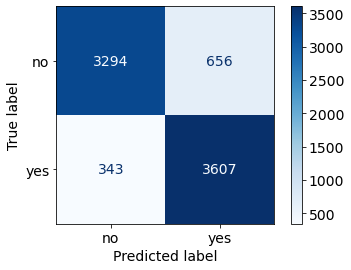

In [1083]:
plot_confusion_matrix(svc_linear_best, X_train_new, y_train_new,
                      display_labels=['no','yes'],cmap='Blues')
plt.savefig("figures/svc_linear_confusion_matrix.png", bbox_inches="tight")

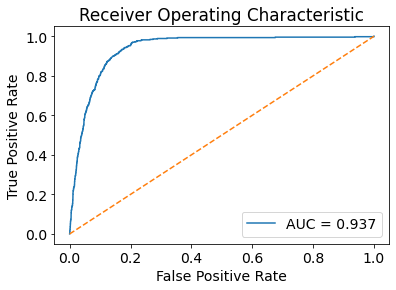

In [1082]:
draw_roc(svc_linear_best)
plt.savefig("figures/svc_linear_roc.png", bbox_inches="tight")

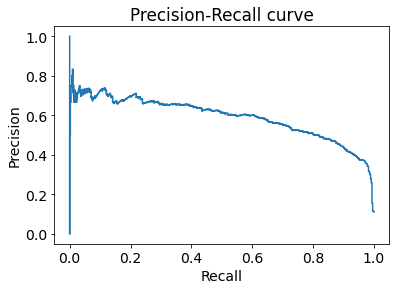

In [1081]:
disp = plot_precision_recall_curve(svc_linear_best, X_test_prep, y_test_prep)
disp.ax_.set_title('Precision-Recall curve')
disp.ax_.get_legend().remove()
plt.savefig("figures/svc_linear_precision_recall_curve.png", bbox_inches="tight")

## Support Vector Classifier -- rbf

In [756]:
svc_rbf = SVC(kernel = 'rbf')
param_grid = {'C':[0.01,0.1,1,10,100],
              'gamma':['scale',1,0.1,0.001]}

svcR_best_model, svcR_socres, svcR_res = MLpipe(X_train_new, y_train_new,svc_rbf,param_grid,score)

In [765]:
with open("svcR_best_model.txt", "wb") as fp:   #Pickling
    pickle.dump(svcR_best_model, fp)
with open("svcR_socres.txt", "wb") as fp:   #Pickling
    pickle.dump(svcR_socres, fp)
with open("svcR_res.txt", "wb") as fp:   #Pickling
    pickle.dump(svcR_res, fp)

with open("svcR_best_model.txt", "rb") as fp:   # Unpickling
    svcR_best_model = pickle.load(fp)
with open("svcR_socres.txt", "rb") as fp:   # Unpickling
    svcR_socres = pickle.load(fp)
with open("svcR_res.txt", "rb") as fp:   # Unpickling
    svcR_res = pickle.load(fp)

In [794]:
svcR_best_model[0]

{'C': 10, 'gamma': 'scale'}

In [1005]:
c = svcR_best_model[0]['C']
gamma = svcR_best_model[0]['gamma']
svc_rbf_best = SVC(kernel = 'rbf', C = c, gamma = gamma,probability=True)
svc_rbf_best.fit(X_train_new,y_train_new)

SVC(C=10, probability=True)

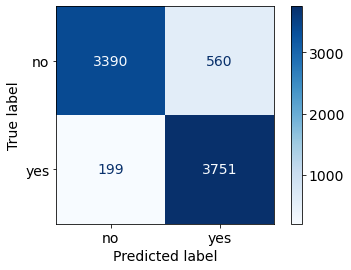

In [1084]:
plot_confusion_matrix(svc_rbf_best, X_train_new, y_train_new,
                      display_labels=['no','yes'],cmap='Blues')
plt.savefig("figures/svc_rbf_confusion_matrix.png", bbox_inches="tight")

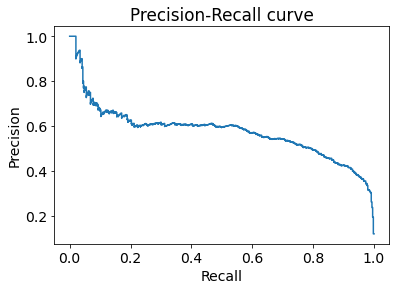

In [1085]:
disp = plot_precision_recall_curve(svc_rbf_best, X_test_prep, y_test_prep)
disp.ax_.set_title('Precision-Recall curve')
disp.ax_.get_legend().remove()
plt.savefig("figures/svc_rbf_precision_recall_curve.png", bbox_inches="tight")

## XGBClassifier

In [466]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [994]:
param_grid = {"learning_rate": [0.03],
              "n_estimators": [1000],
              "seed": [0],
              "missing": [np.nan], 
              "colsample_bytree": [0.6, 0.9], 
              "max_depth": [1,3,10,30,100],
              "subsample": [0.66,0.8]}

xgb_best_model, xgb_scores, xgb_res = MLpipe(X_train_new, y_train_new,xgb,param_grid,score);

KeyboardInterrupt: 

In [995]:
with open("xgb_best_model.txt", "rb") as fp:   # Unpickling
    xgb_best_model = pickle.load(fp)
with open("xgb_scores.txt", "rb") as fp:   # Unpickling
    xgb_scores = pickle.load(fp)
with open("xgb_res.txt", "rb") as fp:   # Unpickling
    xgb_res = pickle.load(fp)

In [998]:
xgb_best_model[0]

{'colsample_bytree': 0.6,
 'learning_rate': 0.03,
 'max_depth': 3,
 'missing': nan,
 'n_estimators': 1000,
 'seed': 0,
 'subsample': 0.66}

In [1007]:
xgb_best = XGBClassifier(learning_rate = xgb_best_model[0]['learning_rate'],
                        n_estimators = xgb_best_model[0]['n_estimators'],
                        seed = xgb_best_model[0]['seed'],
                        missing = xgb_best_model[0]['missing'],
                        colsample_bytree = xgb_best_model[0]['colsample_bytree'],
                        max_depth = xgb_best_model[0]['max_depth'],
                        subsample = xgb_best_model[0]['subsample'])
xgb_best.fit(X_train_new,y_train_new)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=0.66, tree_method='exact', validate_parameters=1,
              verbosity=None)

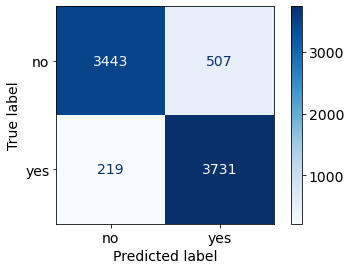

In [1086]:
plot_confusion_matrix(xgb_best, X_train_new, y_train_new,
                      display_labels=['no','yes'],cmap='Blues')
plt.savefig("figures/xgb_confusion_matrix.png", bbox_inches="tight")

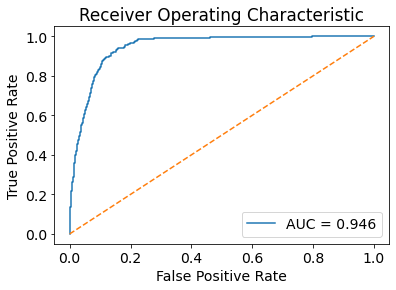

In [1087]:
draw_roc(xgb_best)
plt.savefig("figures/xgb_roc.png", bbox_inches="tight")

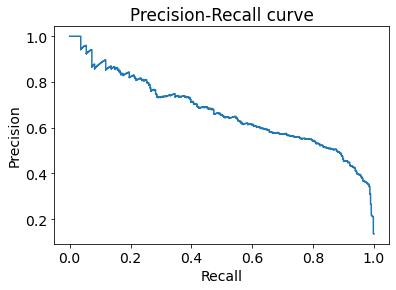

In [1088]:
disp = plot_precision_recall_curve(xgb_best, X_test_prep, y_test_prep)
disp.ax_.set_title('Precision-Recall curve')
disp.ax_.get_legend().remove()
plt.savefig("figures/xgb_precision_recall_curve.png", bbox_inches="tight")

## Interpret your model -- Feature Selection

In [1013]:
baseline = score(y_test_prep, [0]*len(y_test_prep))
(np.mean(Log_scores)-baseline)/np.std(Log_scores)

690.3092310801062

In [1016]:
(np.mean(RF_socres)-baseline)/np.std(RF_socres)

154.5170254713653

In [1042]:
np.mean(xgb_scores)

0.788362793618709

In [1018]:
(np.mean(svcL_socres)-baseline)/np.std(svcL_socres)

276.26620510518416

In [1019]:
(np.mean(svcR_socres)-baseline)/np.std(svcR_socres)

155.65287604890543

In [1020]:
(np.mean(xgb_scores)-baseline)/np.std(xgb_scores)

260.987001611044

In [815]:
ftr_names = X.columns

def plot_importance(model, X_test, y_test,plt):
    np.random.seed(42)

    nr_runs = 10
    scores = np.zeros([len(ftr_names),nr_runs])
    
    # loop through the features
    for i in range(len(ftr_names)):
#         print('shuffling '+str(ftr_names[i]))
        f_scores = []
        for j in range(nr_runs):
            X_test_shuffled = X_test.copy()
            X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
#             clf.fit_transform(X_train)
            X_test_shuffled_prep = clf.transform(X_test_shuffled)
            y_test_prep = le.transform(y_test)
            y_pred_shuffled = model.predict(X_test_shuffled_prep)
            f_scores.append(score(y_test_prep,y_pred_shuffled))
#         print('   shuffled test score:',np.around(np.mean(f_scores),3),'+/-',np.around(np.std(f_scores),3))
        scores[i] = f_scores
    sorted_indcs = np.argsort(np.mean(scores,axis=1))
    top_ten = sorted_indcs[:10]
    xs = [scores[i] for i in top_ten]
    ys = [ftr_names[i] for i in top_ten]
#     plt.rcParams.update({'font.size': 14})
#     plt.figure(figsize=(8,6))
    plt.boxplot(xs,labels=ys,vert=False)
    plt.axvline(test_score,label='test score = {:0.3f}'.format(test_score))
#     plt.title("Permutation Importances (test set)")
#     plt.xlabel('score with perturbed feature')
    plt.legend(loc = 'upper left')
#     plt.tight_layout()
#     plt.show()

test baseline =  0.48145605846199335


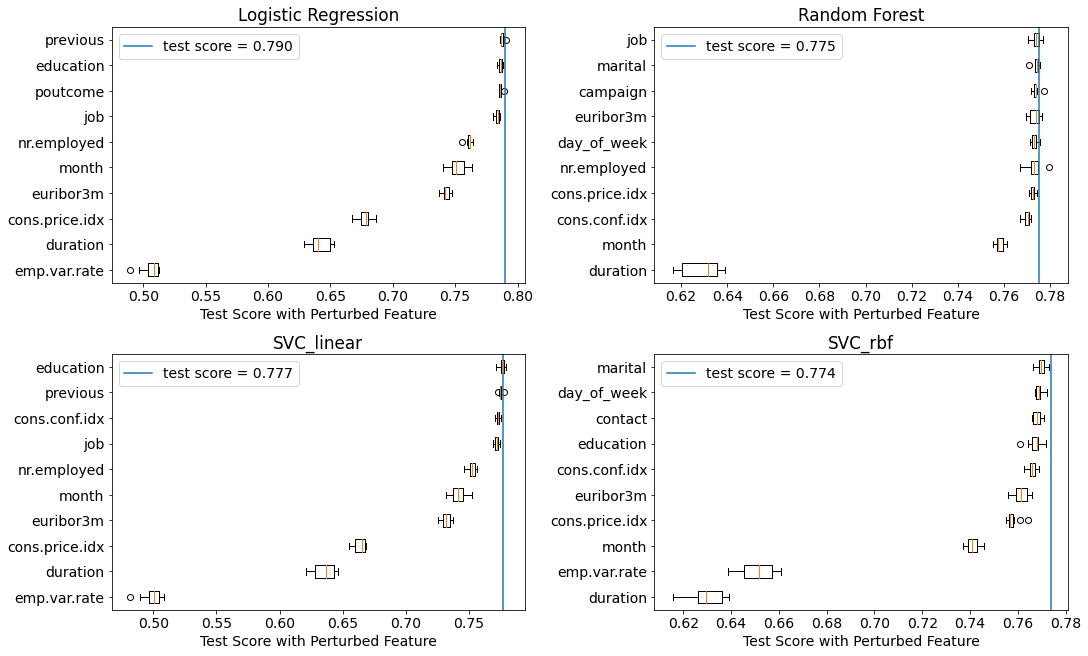

In [1089]:
fig, f_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(15,9))
print('test baseline = ',score(y_test_prep, [0]*len(y_test_prep)))
algos = [LogReg_best,RF_best, svc_linear_best, svc_rbf_best]
algos_name = ['Logistic Regression','Random Forest', 'SVC_linear', 'SVC_rbf']
i = 0
for row in f_axes:
    for col in row:
        algo = algos[i]
        y_pred = algo.predict(X_test_prep)
        test_score = score(y_test_prep, y_pred)
    #     print('test score = ',test_score)
    #     print('test baseline = ',score(y_test_prep, [0]*len(y_test_prep)))
        plot_importance(algo, X_test, y_test, col)
        col.set_xlabel('Test Score with Perturbed Feature')
        col.set_title(algos_name[i])
        i += 1
plt.savefig("figures/feature_importance.png", bbox_inches="tight")

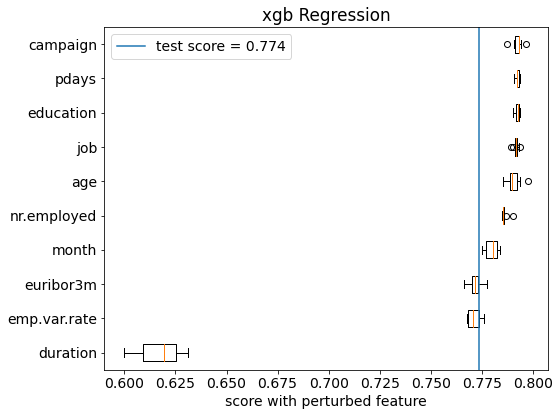

In [1091]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plot_importance(xgb_best, X_test, y_test, plt)
plt.title("xgb Regression")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig("figures/xgb_feature_importance.png", bbox_inches="tight")
plt.show()

In [991]:
# metrics = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# result = {}
# for i in metrics:
#     score = xgb_best.get_booster().get_score(importance_type=i)
#     result[i] = [(k,v) for k, v in sorted(score.items(), key=lambda item: item[1], reverse=True)][:10]
# for k,v in result.items():
#     xs = [i[0] for i in v]
#     ys = [i[1] for i in v]
#     plt.rcParams.update({'font.size': 14})
#     plt.figure(figsize=(8,6))
#     plt.bar(xs,ys)
#     plt.title("{} Importances (test set)".format(k))
#     plt.tight_layout()
#     plt.xticks(rotation=45)
#     plt.xlabel('feature')
#     plt.ylabel('score')
#     plt.show()

## SHAP values

In [918]:
# X_test_transformed[0]
np.reshape(X_test_transformed, (56, 3946))[0]
np.reshape(y_test_prep, (1, len(y_test_prep))).shape
np.reshape(X_test_transformed, (56, 3946)).shape

(56, 3946)

In [927]:
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(RF_best)
# transform the test set
X_test_transformed = preprocessor.transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))

(3946, 56)
(2, 3946, 56)


In [972]:
preprocessor.named_transformers_
# preprocessor.named_transformers_['onehot'].get_feature_names()
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pre_cat', 'camp_cat'],
      dtype='object')

In [973]:
feature_names = [c for c in ordinal_ftrs + list(preprocessor.named_transformers_['onehot'].get_feature_names()) + minmax_ftrs + std_ftrs if c not in onehot_ftrs]
len(feature_names)

56

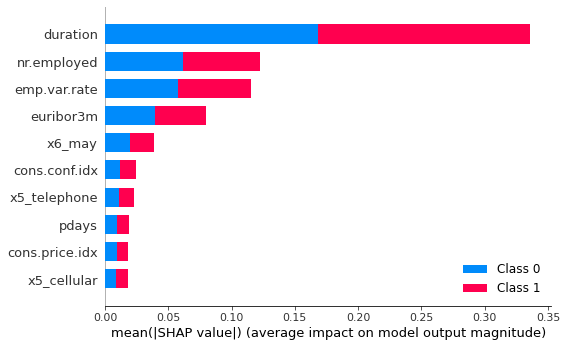

In [1092]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names, max_display=10, show = False)
plt.savefig("figures/rf_summary_plot.png", bbox_inches="tight")

In [923]:
import shap

shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
# transform the test set
X_test_transformed = preprocessor.transform(X_test)
explainer = shap.KernelExplainer(LogReg_best.predict, X_test_transformed)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(np.reshape(y_test_prep, (1, len(y_test_prep))))
print(np.shape(shap_values))

(3946, 56)


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

## Logistic Regression

In [638]:
y_pred = LogReg_best.predict(X_test_prep)
test_score = score(y_test_prep, y_pred)
print('test score = ',test_score)
print('test baseline = ',score(y_test_prep, [0]*len(y_test_prep)))

test score =  0.7890913061969329
test baseline =  0.48145605846199335


shuffling age
   shuffled test score: 0.789 +/- 0.001
shuffling job
   shuffled test score: 0.783 +/- 0.001
shuffling marital
   shuffled test score: 0.789 +/- 0.001
shuffling education
   shuffled test score: 0.786 +/- 0.002
shuffling default
   shuffled test score: 0.791 +/- 0.001
shuffling housing
   shuffled test score: 0.791 +/- 0.001
shuffling loan
   shuffled test score: 0.789 +/- 0.001
shuffling contact
   shuffled test score: 0.791 +/- 0.001
shuffling month
   shuffled test score: 0.754 +/- 0.006
shuffling day_of_week
   shuffled test score: 0.791 +/- 0.001
shuffling duration
   shuffled test score: 0.641 +/- 0.008
shuffling campaign
   shuffled test score: 0.789 +/- 0.001
shuffling pdays
   shuffled test score: 0.788 +/- 0.001
shuffling previous
   shuffled test score: 0.787 +/- 0.002
shuffling poutcome
   shuffled test score: 0.786 +/- 0.001
shuffling emp.var.rate
   shuffled test score: 0.509 +/- 0.007
shuffling cons.price.idx
   shuffled test score: 0.685 +/- 0.006
shuffli

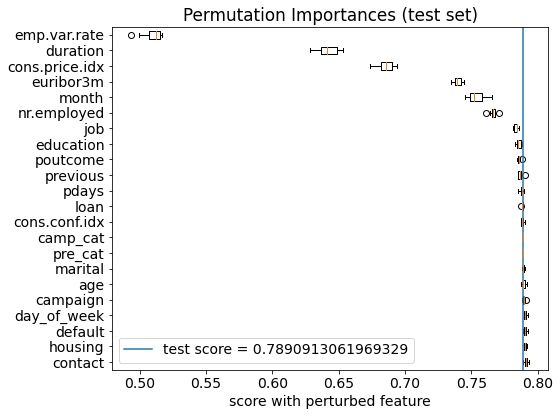

In [639]:
# test_score = LogReg_best.score(X_test_pre,y_test)
#     print('test score = ',test_score)
#     print('test baseline = ',np.sum(y_test == 0)/len(y_test))
plot_importance(LogReg_best, X_test, y_test)
# print(X_test_prep[ftr_names[1]].values)

## RandomForestClassifier

test score =  0.7860450319843733
test baseline =  0.48145605846199335
shuffling age
   shuffled test score: 0.784 +/- 0.001
shuffling job
   shuffled test score: 0.789 +/- 0.002
shuffling marital
   shuffled test score: 0.784 +/- 0.001
shuffling education
   shuffled test score: 0.784 +/- 0.002
shuffling default
   shuffled test score: 0.785 +/- 0.002
shuffling housing
   shuffled test score: 0.787 +/- 0.001
shuffling loan
   shuffled test score: 0.784 +/- 0.001
shuffling contact
   shuffled test score: 0.787 +/- 0.002
shuffling month
   shuffled test score: 0.773 +/- 0.002
shuffling day_of_week
   shuffled test score: 0.781 +/- 0.003
shuffling duration
   shuffled test score: 0.629 +/- 0.008
shuffling campaign
   shuffled test score: 0.785 +/- 0.002
shuffling pdays
   shuffled test score: 0.786 +/- 0.001
shuffling previous
   shuffled test score: 0.787 +/- 0.001
shuffling poutcome
   shuffled test score: 0.784 +/- 0.002
shuffling emp.var.rate
   shuffled test score: 0.791 +/- 0.003
sh

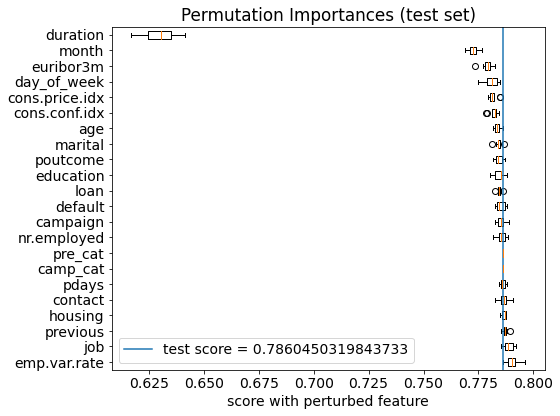

In [640]:
y_pred = RF_best.predict(X_test_prep)
test_score = score(y_test_prep, y_pred)
print('test score = ',test_score)
print('test baseline = ',score(y_test_prep, [0]*len(y_test_prep)))
plot_importance(RF_best, X_test, y_test)

## Support Vector Classifier -- Linear

test score =  0.7773782543215847
test baseline =  0.48145605846199335
shuffling age
   shuffled test score: 0.778 +/- 0.001
shuffling job
   shuffled test score: 0.772 +/- 0.002
shuffling marital
   shuffled test score: 0.778 +/- 0.001
shuffling education
   shuffled test score: 0.776 +/- 0.002
shuffling default
   shuffled test score: 0.78 +/- 0.001
shuffling housing
   shuffled test score: 0.779 +/- 0.001
shuffling loan
   shuffled test score: 0.778 +/- 0.001
shuffling contact
   shuffled test score: 0.781 +/- 0.002
shuffling month
   shuffled test score: 0.741 +/- 0.006
shuffling day_of_week
   shuffled test score: 0.776 +/- 0.001
shuffling duration
   shuffled test score: 0.636 +/- 0.009
shuffling campaign
   shuffled test score: 0.777 +/- 0.0
shuffling pdays
   shuffled test score: 0.777 +/- 0.001
shuffling previous
   shuffled test score: 0.775 +/- 0.001
shuffling poutcome
   shuffled test score: 0.776 +/- 0.001
shuffling emp.var.rate
   shuffled test score: 0.499 +/- 0.007
shuff

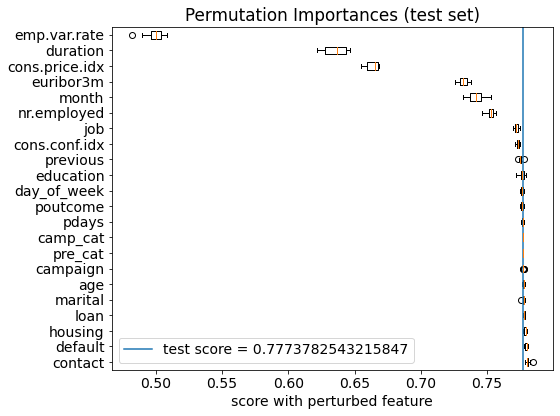

In [642]:
y_pred = svc_linear_best.predict(X_test_prep)
test_score = score(y_test_prep, y_pred)
print('test score = ',test_score)
print('test baseline = ',score(y_test_prep, [0]*len(y_test_prep)))
plot_importance(svc_linear_best, X_test, y_test)

In [ ]:
def permu_imp(feature_names, algo):
    np.random.seed(42)

    nr_runs = 10
    ftr_names = feature_names
    scores = np.zeros([len(ftr_names),nr_runs])
    metric = lambda y, pred: np.sqrt(mean_squared_error(y,pred))
    X_test_prep = preprocessor.transform(X_test)

    for i in range(len(ftr_names)):
    #     print('shuffling '+str(ftr_names[i]))
        recall_scores = []
        for j in range(nr_runs):
            X_test_shuffled = df_test.copy()
            X_test_shuffled[ftr_names[i]] = np.random.permutation(df_test[ftr_names[i]].values)
            y_test_pred = algo.predict(X_test_shuffled)
            recall_scores.append(metric(y_test,y_test_pred))
    #     print('   shuffled test score:',np.around(np.mean(rmse_scores),3),'+/-',np.around(np.std(rmse_scores),3))
        scores[i] = rmse_scores

In [568]:
from sklearn.metrics import fbeta_score
y_pred = RF_best.predict(X_test_prep)
score = fbeta_score(y_test_prep, y_pred, average='macro', beta=1.5)
score

0.7857266605498222

In [669]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
# use fit_transform to run PCA on our standardized matrix
pca = pca.fit_transform(X_train_new)

In [670]:
pca.shape

(7900, 10)

In [671]:
param_grid = {'penalty':['l1','l2'],
              'C': 1/np.logspace(-2,2,21)}
# Log_best, Log_res = MLpipe(X_train_new, y_train_new,LogReg,param_grid,score)
best_models, scores =MLpipe(pca, y_train_new,LogReg,param_grid,score)

In [672]:
c = best_models['C']
penalty = best_models['penalty']
LogReg2 = LogisticRegression(penalty=penalty, C = c,solver ='saga',max_iter = 1000)
LogReg2.fit(X_train_new,y_train_new)

LogisticRegression(C=0.0630957344480193, max_iter=1000, penalty='l1',
                   solver='saga')

In [673]:
y_pred2 = LogReg2.predict(X_test_prep)

In [674]:
fbeta_score(y_test_prep, y_pred2, average='macro', beta=1.5)

0.7800068350298623

In [1021]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

TypeError: Singleton array array(2) cannot be considered a valid collection.

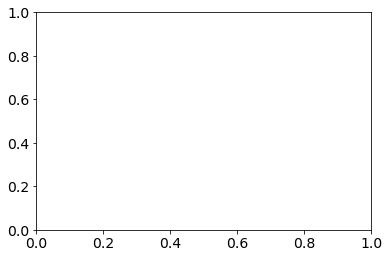

In [1026]:
fig, ax = plt.subplots()
n_splits = 5
groups = 2
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X_train_new, y_train_new, groups, ax, n_splits)

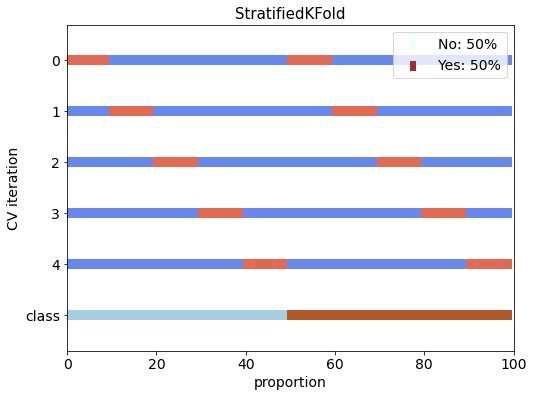

In [1059]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

#     ax.scatter(range(len(X)), [ii + 2.5] * len(X),
#                c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class']
    ax.set(yticks=np.arange(n_splits+1) + .5, yticklabels=yticklabels,
           xlabel='proportion', ylabel="CV iteration",
           ylim=[n_splits+1.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 5
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [0.5, 0.5]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])
fig, ax = plt.subplots(figsize=(8,6))
cv = StratifiedKFold(n_splits)
ax = plot_cv_indices(cv, X, y, groups, ax, n_splits)
ax.legend(["No: 50%", "Yes: 50%"], loc='upper right')
leg = ax.get_legend()
color = ['Honeydew','brown']
for i in range(len(percentiles_classes)):
    leg.legendHandles[i].set_color(color[i])
plt.savefig("figures/StratifiedKFold.png")